(200, 200)


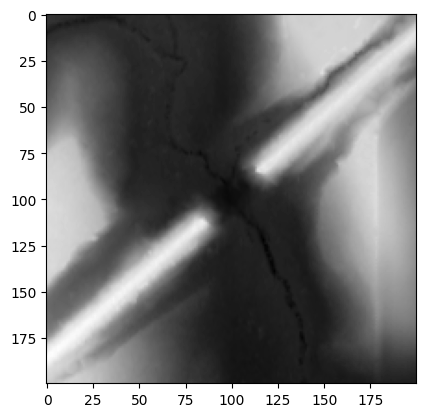

In [7]:
# The main source is https://blog.paperspace.com/train-yolov5-custom-data/
from PIL import Image
import numpy as np
import os
import glob
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.preprocessing import minmax_scale
im = Image.open('Sample200by200/DEM/T_DEM/1987.tif')
arr = np.asarray(im)
print(arr.shape)
plt.imshow(arr, cmap='gray')
plt.show()

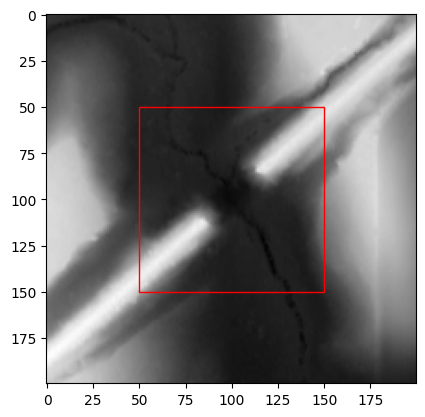

In [2]:
fig, ax = plt.subplots()
ax.imshow(arr, cmap='gray')
rect = patches.Rectangle((50, 50), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

(200, 200)


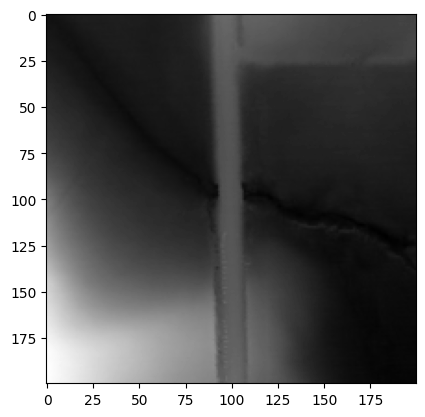

In [3]:
im = Image.open('Sample200by200/DEM/T_DEM/1988.tif')
arr = np.asarray(im)
print(arr.shape)
plt.imshow(arr, cmap='gray')
plt.show()

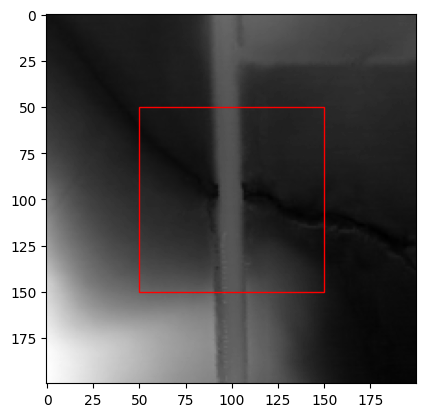

In [4]:
fig, ax = plt.subplots()
ax.imshow(arr, cmap='gray')
rect = patches.Rectangle((50, 50), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

(200, 200)


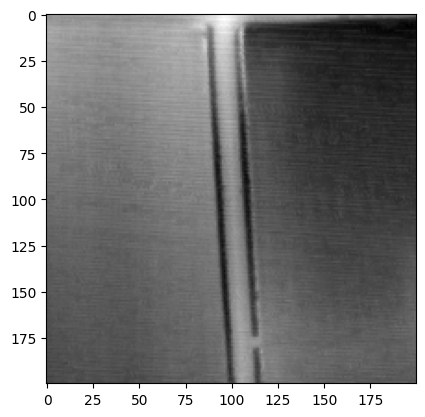

In [5]:
im = Image.open('Sample200by200/DEM/F_DEM/4.tif')
arr = np.asarray(im)
print(arr.shape)
plt.imshow(arr, cmap='gray')
plt.show()

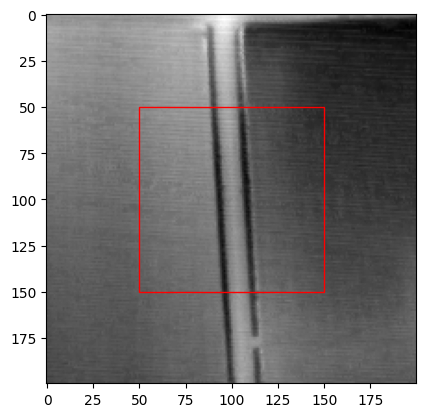

In [6]:
fig, ax = plt.subplots()
ax.imshow(arr, cmap='gray')
rect = patches.Rectangle((50, 50), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

## convert data to gray scale

In [ ]:
!mkdir -p 'geography_dataset/images/DEM/F_DEM/'
!mkdir -p 'geography_dataset/images/DEM/T_DEM/'

In [ ]:
for i in range(3377, 3974):
    img = Image.open('Sample200by200/DEM/T_DEM/{0}.tif'.format(i))
    img = np.asarray(img)
    shape = img.shape
    img = minmax_scale(img.ravel(), feature_range=(0,255)).reshape(shape).astype(np.uint8)
    img = np.asarray(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    Image.fromarray(img).save(
                'geography_dataset/images/DEM/T_DEM/{0}.tif'.format(i))

In [ ]:
for i in range(0, 1987):
    img = Image.open('Sample200by200/DEM/F_DEM/{0}.tif'.format(i))
    img = np.asarray(img)
    shape = img.shape
    img = minmax_scale(img.ravel(), feature_range=(0,255)).reshape(shape).astype(np.uint8)
    img = np.asarray(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)    
    Image.fromarray(img).save(
                'geography_dataset/images/DEM/F_DEM/{0}.tif'.format(i))

## Clean the Data manually 

In [ ]:
## Rename the images 
!mkdir -p culvert-dataset/images

In [ ]:
i = 0
for file in glob.glob("geography_dataset/images/DEM/F_DEM/*.tif"):
    os.rename(file, f"culvert-dataset/images/{i}.tif")
    i += 1 

i = 1957
for file in glob.glob("geography_dataset/images/DEM/T_DEM/*.tif"):
    os.rename(file, f"culvert-dataset/images/{i}.tif")
    i += 1 

## After cleaning the 'DEM/F_DEM/' False labels range from (0 - 1956 ) and True label range from(1957-3938

### Create xml annotations for each image. Annotations for the dataset follows PASCAL VOC XML format, which is a very popular format.

In [ ]:
!mkdir -p culvert-dataset/annotations

In [10]:
for i in range(1957): 
    annotation = ET.Element('annotation')
    folder = ET.SubElement(annotation, 'folder')
    filename = ET.SubElement(annotation, 'filename')
    size = ET.SubElement(annotation, 'size')
    segmented = ET.SubElement(annotation, 'segmented')
    object = ET.SubElement(annotation, 'object')

    folder.text = 'images'
    filename.text = f'{i}.tif'
    segmented.text = '0'

    # size items
    width = ET.SubElement(size, 'width')
    height = ET.SubElement(size, 'height')
    depth = ET.SubElement(size, 'depth')
    width.text = '200'
    height.text = '200'
    depth.text = '1'

    # object items
    name = ET.SubElement(object, 'name')
    pose = ET.SubElement(object, 'pose')
    truncated = ET.SubElement(object, 'truncated')
    occluded = ET.SubElement(object, 'occluded')
    difficult = ET.SubElement(object, 'difficult')
    name.text = 'False'
    pose.text = 'Unspecified'
    truncated.text = '0'
    occluded.text = '0'
    difficult.text = '0'

    bndbox = ET.SubElement(object, 'bndbox')
    xmin = ET.SubElement(bndbox, 'xmin')
    xmax = ET.SubElement(bndbox, 'xmax')
    ymin = ET.SubElement(bndbox, 'ymin')
    ymax = ET.SubElement(bndbox, 'ymax')
    xmin.text = '50'
    xmax.text = '150'
    ymin.text = '50'
    ymax.text = '150'
    # create a new XML file with the results
    mydata = ET.tostring(annotation)    
    myfile = open(f"culvert-dataset/annotations/{i}.xml", "wb")
    myfile.write(mydata)

In [11]:
for i in range(1957, 3939): 
    annotation = ET.Element('annotation')
    folder = ET.SubElement(annotation, 'folder')
    filename = ET.SubElement(annotation, 'filename')
    size = ET.SubElement(annotation, 'size')
    segmented = ET.SubElement(annotation, 'segmented')
    object = ET.SubElement(annotation, 'object')

    folder.text = 'images'
    filename.text = f'{i}.tif'
    segmented.text = '0'

    # size items
    width = ET.SubElement(size, 'width')
    height = ET.SubElement(size, 'height')
    depth = ET.SubElement(size, 'depth')
    width.text = '200'
    height.text = '200'
    depth.text = '1'

    # object items
    name = ET.SubElement(object, 'name')
    pose = ET.SubElement(object, 'pose')
    truncated = ET.SubElement(object, 'truncated')
    occluded = ET.SubElement(object, 'occluded')
    difficult = ET.SubElement(object, 'difficult')
    name.text = 'True'
    pose.text = 'Unspecified'
    truncated.text = '0'
    occluded.text = '0'
    difficult.text = '0'

    bndbox = ET.SubElement(object, 'bndbox')
    xmin = ET.SubElement(bndbox, 'xmin')
    xmax = ET.SubElement(bndbox, 'xmax')
    ymin = ET.SubElement(bndbox, 'ymin')
    ymax = ET.SubElement(bndbox, 'ymax')
    xmin.text = '50'
    xmax.text = '150'
    ymin.text = '50'
    ymax.text = '150'
    # create a new XML file with the results
    mydata = ET.tostring(annotation)    
    myfile = open(f"culvert-dataset/annotations/{i}.xml", "wb")
    myfile.write(mydata)